<a href="https://colab.research.google.com/github/PhantomHunt/Major-Project/blob/master/Character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks (CNNs)

Import TensorFlow

In [1]:
# %tensorflow_version 2.x
# !pip uninstall -y tensorflow
!pip install tensorflow
#!pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import datetime
import os

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#converting 3D tensor to 2D tensor
print ("Before reshaping")
print ("================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print ("\nAfter reshaping:")
print ("================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)
print ()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Before reshaping
Number of axes in train_images:  3
Number of axes in test_images:  3
Shape of train_images:  (60000, 28, 28)
Shape of test_images:  (10000, 28, 28)

After reshaping:
Number of axes in train_images:  4
Number of axes in test_images:  4
Shape of train_images:  (60000, 28, 28, 1)
Shape of test_images:  (10000, 28, 28, 1)



### Create the convolutional base

In [3]:
model = models.Sequential()

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.

In [4]:
model.add(layers.Conv2D(32, (3,3,), activation='relu', input_shape=(28, 28, 1)))

In [5]:
model.add(layers.MaxPooling2D((2,2)))

In [6]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()
#we did not use padding. for 2nd and 3rd convolution op, we used 64 filters each and in first used 32 filters. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


To complete our model, we will feed the last output tensor from the convolutional base (of shape(3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output in a 3D tensor. First, we will fatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use final Dense layer with 10 ouputs and a softmax activation.

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Compile and train the model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 578us/sample - loss: 0.1529 - accuracy: 0.9535
Epoch 2/5
60000/60000 [==============================] - 31s 513us/sample - loss: 0.0477 - accuracy: 0.9847
Epoch 3/5
60000/60000 [==============================] - 29s 491us/sample - loss: 0.0353 - accuracy: 0.9887-
Epoch 4/5
60000/60000 [==============================] - 29s 485us/sample - loss: 0.0257 - accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 29s 483us/sample - loss: 0.0206 - accuracy: 0.9935


Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print (test_acc*100, '%')

10000/10000 [==============================] - 1s 139us/sample - loss: 0.0320 - accuracy: 0.9909
99.08999800682068 %


Testing the model

In [13]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

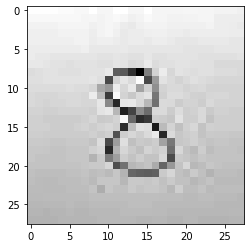

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/8.jpeg')
img = mpimg.imread('./Images/8.jpeg')
gray = rgb2gray(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [24]:
gray.shape

(28, 28)

In [108]:
new_img = np.expand_dims(gray, axis=2)
new_img.shape

(28, 28, 1)

In [26]:
test_predict = model.predict([[new_img]])

In [96]:
test_predict

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.126063e-16, 0.000000e+00]], dtype=float32)

In [111]:
print(test_predict)
temp = test_predict.flatten()
max = 0
index = -1
for i in range(temp.size):
  if temp[i] > max:
    max=temp[i]
    index = i

print("The Number is ",index)

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 2.126063e-16 0.000000e+00]]
The Number is  4


## Classification with Feedforward Neural Networks

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model_dnn = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_dnn.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2990 - accuracy: 0.9124
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1412 - accuracy: 0.9584
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1062 - accuracy: 0.9675
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0859 - accuracy: 0.9737
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0750 - accuracy: 0.9762


In [0]:
test_loss, test_acc = model_dnn.evaluate(x_test, y_test)
print (test_acc*100, '%')

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0799 - accuracy: 0.9750
97.50000238418579 %


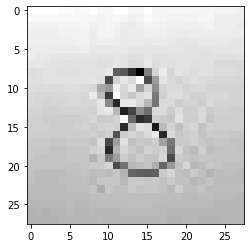

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/8.jpeg')
gray = rgb2gray(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
gray.shape
new_img = np.expand_dims(gray, axis=2)
new_img.shape
test_predict = model.predict([[new_img]])
test_predict

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)